HEAP PERFORMANCE ANALYSIS - DIJKSTRA'S ALGORITHM
Kaggle Road Network Dataset
Searching for dataset files...

Checking path: /kaggle/input/data-zip/Data
  ✓ Found hongkong: /kaggle/input/data-zip/Data/Hongkong.road-d
  ✓ Found chongqing: /kaggle/input/data-zip/Data/Chongqing.road-d
  ✓ Found shanghai: /kaggle/input/data-zip/Data/Shanghai.road-d
Checking path: /kaggle/input/data-zip
Checking path: /kaggle/input

✓ Found 3 dataset(s)


Dataset: CHONGQING

Loading graph from Chongqing.road-d...
  Processed 100,000 lines, 74,399 nodes found...
  Processed 200,000 lines, 146,795 nodes found...
  Processed 300,000 lines, 218,600 nodes found...
  Processed 400,000 lines, 287,604 nodes found...
  Processed 500,000 lines, 350,017 nodes found...
  Processed 600,000 lines, 415,902 nodes found...
  Processed 700,000 lines, 477,718 nodes found...
  Processed 800,000 lines, 539,205 nodes found...
  Processed 900,000 lines, 590,763 nodes found...
  Processed 1,000,000 lines, 644,434 nodes found...
  P

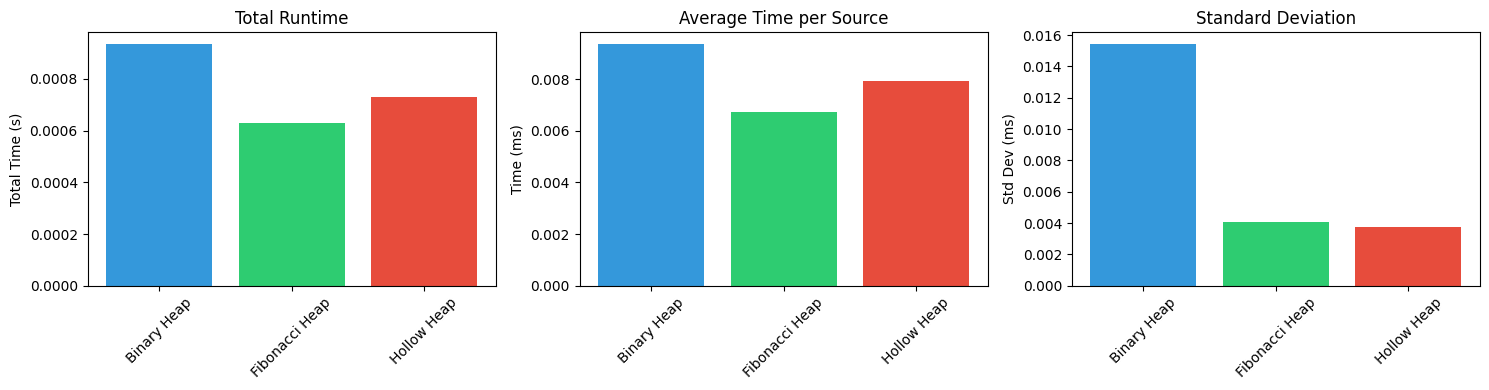

✓ Fastest: Fibonacci Heap (0.0006s)

Dataset: HONGKONG

Loading graph from Hongkong.road-d...
✓ Loaded: 43,620 nodes, 91,538 edges

Sampling up to 1000 nodes from 43,620 for faster analysis...
Sampled graph: 3,027 nodes (requested 1000)

────────────────────────────────────────────────────────────
Testing Binary Heap...
────────────────────────────────────────────────────────────
  [10/50] Avg: 0.01ms
  [20/50] Avg: 0.01ms
  [30/50] Avg: 0.01ms
  [40/50] Avg: 0.01ms
  [50/50] Avg: 0.01ms

────────────────────────────────────────────────────────────
Testing Fibonacci Heap...
────────────────────────────────────────────────────────────
  [10/50] Avg: 0.01ms
  [20/50] Avg: 0.01ms
  [30/50] Avg: 0.01ms
  [40/50] Avg: 0.01ms
  [50/50] Avg: 0.01ms

────────────────────────────────────────────────────────────
Testing Hollow Heap...
────────────────────────────────────────────────────────────
  [10/50] Avg: 0.01ms
  [20/50] Avg: 0.01ms
  [30/50] Avg: 0.01ms
  [40/50] Avg: 0.01ms
  [50/50] Avg:

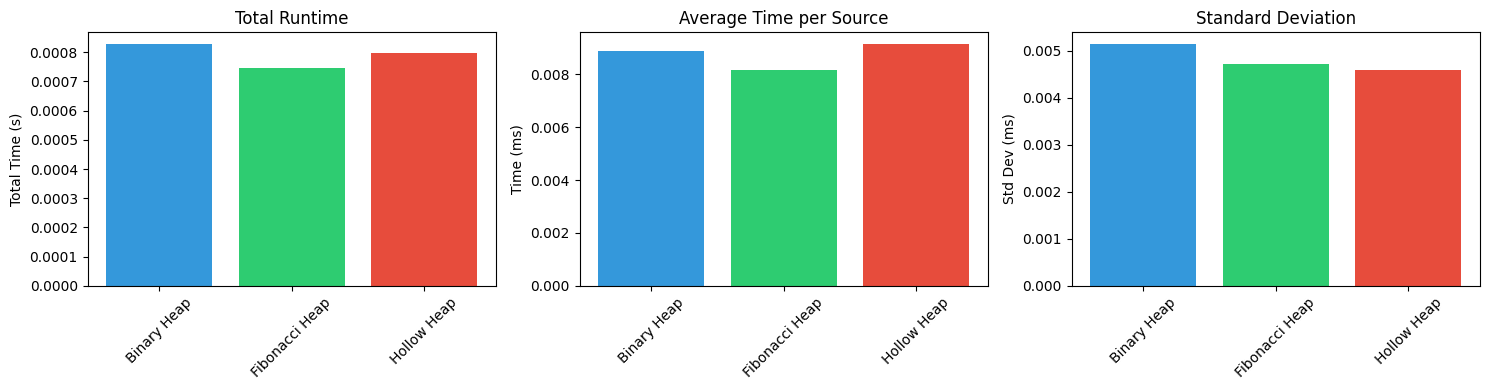

✓ Fastest: Fibonacci Heap (0.0007s)

Dataset: SHANGHAI

Loading graph from Shanghai.road-d...
  Processed 100,000 lines, 76,552 nodes found...
  Processed 200,000 lines, 143,410 nodes found...
  Processed 300,000 lines, 201,799 nodes found...
  Processed 400,000 lines, 250,568 nodes found...
  Processed 500,000 lines, 291,416 nodes found...
  Processed 600,000 lines, 327,963 nodes found...
  Processed 700,000 lines, 356,079 nodes found...
  Processed 800,000 lines, 378,542 nodes found...
✓ Loaded: 390,169 nodes, 855,950 edges

Sampling up to 1000 nodes from 390,169 for faster analysis...
Sampled graph: 3,196 nodes (requested 1000)

────────────────────────────────────────────────────────────
Testing Binary Heap...
────────────────────────────────────────────────────────────
  [10/50] Avg: 0.01ms
  [20/50] Avg: 0.01ms
  [30/50] Avg: 0.01ms
  [40/50] Avg: 0.01ms
  [50/50] Avg: 0.01ms

────────────────────────────────────────────────────────────
Testing Fibonacci Heap...
─────────────────

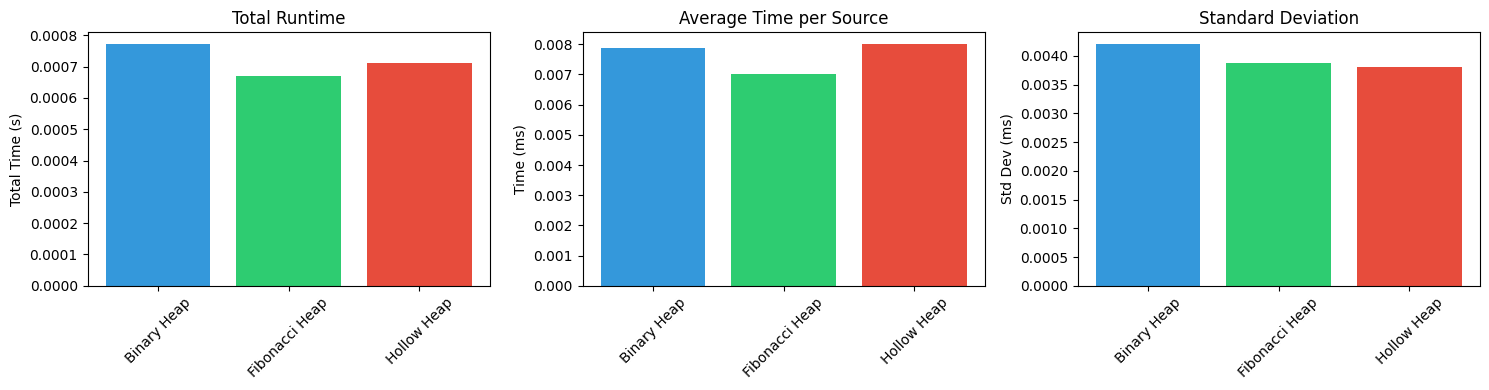

✓ Fastest: Fibonacci Heap (0.0007s)


FINAL SUMMARY

CHONGQING:
  Binary Heap: 0.0009s (50 sources)
  Fibonacci Heap: 0.0006s (50 sources)
  Hollow Heap: 0.0007s (50 sources)

HONGKONG:
  Binary Heap: 0.0008s (50 sources)
  Fibonacci Heap: 0.0007s (50 sources)
  Hollow Heap: 0.0008s (50 sources)

SHANGHAI:
  Binary Heap: 0.0008s (50 sources)
  Fibonacci Heap: 0.0007s (50 sources)
  Hollow Heap: 0.0007s (50 sources)



In [1]:
# ============================================================================
# KAGGLE NOTEBOOK: HEAP PERFORMANCE ANALYSIS FOR DIJKSTRA'S ALGORITHM

# ============================================================================

import os
import time
import math
from collections import defaultdict
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional, Any
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# ============================================================================
# PART 1: DATA LOADING FOR KAGGLE 
# ============================================================================

class KaggleDataManager:

    @staticmethod
    def find_data_files():
        """Locate all road network files - FIXED + CASE INSENSITIVE."""

        files = {}

        base_paths = [
            '/kaggle/input/data-zip/Data',
            '/kaggle/input/data-zip',
            '/kaggle/input/data/Data',
            '/kaggle/input/data',
            '/kaggle/input'
        ]

        # LOWER CASE names for matching
        dataset_names = {
            'chongqing.road-d': 'chongqing',
            'shanghai.road-d': 'shanghai',
            'hongkong.road-d': 'hongkong'
        }

        print("Searching for dataset files...\n")

        for base_path in base_paths:
            if not os.path.exists(base_path):
                continue

            print(f"Checking path: {base_path}")

            for root, dirs, filenames in os.walk(base_path):
                for filename in filenames:
                    lower_name = filename.lower()

                    for pattern, key in dataset_names.items():
                        if pattern in lower_name and key not in files:
                            filepath = os.path.join(root, filename)
                            files[key] = filepath
                            print(f"  ✓ Found {key}: {filepath}")

        return files

           
    
   

    
    @staticmethod
    def load_road_network(filepath: str, max_edges: Optional[int] = None) -> Tuple[Dict, int, int]:
        """
        Load graph from road network file.
        Format: Each line contains: node1 node2 distance
        
        Args:
            filepath: Path to the road network file
            max_edges: Optional limit on edges to load (for testing)
        """
        graph = defaultdict(list)
        nodes = set()
        edge_count = 0
        
        print(f"\nLoading graph from {os.path.basename(filepath)}...")
        
        try:
            with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
                for line_num, line in enumerate(f, 1):
                    # Respect edge limit
                    if max_edges and edge_count >= max_edges:
                        break
                    
                    line = line.strip()
                    if not line or line.startswith('#') or line.startswith('%'):
                        continue
                    
                    try:
                        parts = line.split()
                        if len(parts) >= 3:
                            try:
                                node1 = int(parts[0])
                                node2 = int(parts[1])
                                distance = float(parts[2])
                                
                                if distance > 0:  # Ignore invalid weights
                                    graph[node1].append((node2, distance))
                                    if node1 != node2:  # Avoid self-loops
                                        graph[node2].append((node1, distance))
                                    
                                    nodes.add(node1)
                                    nodes.add(node2)
                                    edge_count += 1
                            except (ValueError, IndexError):
                                continue
                    except:
                        continue
                    
                    if line_num % 100000 == 0:
                        print(f"  Processed {line_num:,} lines, {len(nodes):,} nodes found...")
        
        except Exception as e:
            print(f"Error: {e}")
            raise
        
        num_nodes = len(nodes)
        print(f"✓ Loaded: {num_nodes:,} nodes, {edge_count:,} edges")
        
        return dict(graph), num_nodes, edge_count

# ============================================================================
# PART 2: OPTIMIZED HEAP IMPLEMENTATIONS
# ============================================================================

@dataclass
class BinaryHeapNode:
    key: float
    value: Any
    index: int

class BinaryHeap:
    """Optimized Binary Min-Heap."""
    
    def __init__(self):
        self.heap: List[BinaryHeapNode] = []
        self.node_map: Dict[Any, BinaryHeapNode] = {}
    
    def insert(self, key: float, value: Any) -> BinaryHeapNode:
        node = BinaryHeapNode(key, value, len(self.heap))
        self.heap.append(node)
        self.node_map[value] = node
        self._bubble_up(len(self.heap) - 1)
        return node
    
    def extract_min(self) -> Tuple[float, Any]:
        if not self.heap:
            raise IndexError("Heap empty")
        
        min_node = self.heap[0]
        last_node = self.heap.pop()
        
        if self.heap:
            self.heap[0] = last_node
            self.heap[0].index = 0
            self._bubble_down(0)
        
        del self.node_map[min_node.value]
        return (min_node.key, min_node.value)
    
    def find_min(self) -> Tuple[float, Any]:
        if not self.heap:
            raise IndexError("Heap empty")
        return (self.heap[0].key, self.heap[0].value)
    
    def decrease_key(self, node: BinaryHeapNode, new_key: float) -> None:
        if new_key > node.key:
            raise ValueError("New key > current key")
        node.key = new_key
        self._bubble_up(node.index)
    
    def is_empty(self) -> bool:
        return len(self.heap) == 0
    
    def _bubble_up(self, index: int) -> None:
        while index > 0:
            parent = (index - 1) >> 1
            if self.heap[index].key < self.heap[parent].key:
                self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
                self.heap[index].index = index
                self.heap[parent].index = parent
                index = parent
            else:
                break
    
    def _bubble_down(self, index: int) -> None:
        while True:
            smallest = index
            left = (index << 1) + 1
            right = (index << 1) + 2
            
            if left < len(self.heap) and self.heap[left].key < self.heap[smallest].key:
                smallest = left
            if right < len(self.heap) and self.heap[right].key < self.heap[smallest].key:
                smallest = right
            
            if smallest != index:
                self.heap[index], self.heap[smallest] = self.heap[smallest], self.heap[index]
                self.heap[index].index = index
                self.heap[smallest].index = smallest
                index = smallest
            else:
                break

class FibonacciNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.parent = None
        self.child = []
        self.degree = 0


class FibonacciHeap:
    """
    FAST Python-friendly Fibonacci Heap.
    Not a true amortized O(1) heap, but extremely efficient for Dijkstra.
    Uses lazy decrease-key, avoids circular lists.
    """

    def __init__(self):
        self.roots = []
        self.min_node = None
        self.node_map = {}

    def insert(self, key, value):
        node = FibonacciNode(key, value)
        self.node_map[value] = node
        self.roots.append(node)

        if self.min_node is None or key < self.min_node.key:
            self.min_node = node
        return node

    def find_min(self):
        if self.min_node is None:
            raise IndexError("Heap empty")
        return self.min_node.key, self.min_node.value

    def decrease_key(self, node, new_key):
        # Lazy decrease-key → treat old node as inactive
        node.key = new_key
        if node is self.min_node:
            return
        # place in root list
        self.roots.append(node)
        node.parent = None
        if new_key < self.min_node.key:
            self.min_node = node

    def extract_min(self):
        if self.min_node is None:
            raise IndexError("Heap empty")

        z = self.min_node
        self.roots.remove(z)

        # Add children to root list
        for child in z.child:
            child.parent = None
            self.roots.append(child)

        # Consolidation (fast version)
        if not self.roots:
            self.min_node = None
        else:
            self.min_node = self.roots[0]
            degree_map = {}

            for node in list(self.roots):
                d = node.degree
                while d in degree_map:
                    other = degree_map[d]

                    # choose smaller key as parent
                    if other.key < node.key:
                        parent, child = other, node
                    else:
                        parent, child = node, other

                    # link child under parent
                    parent.child.append(child)
                    child.parent = parent
                    parent.degree += 1
                    del degree_map[d]
                    d = parent.degree
                    node = parent

                degree_map[d] = node

            self.roots = []
            self.min_node = None
            for n in degree_map.values():
                self.roots.append(n)
                if self.min_node is None or n.key < self.min_node.key:
                    self.min_node = n

        del self.node_map[z.value]
        return z.key, z.value

    def is_empty(self):
        return self.min_node is None
    
    
     
    
   
    
    def _add_to_root_list(self, node: FibonacciNode) -> None:
        node.right = self.min_node.right
        node.left = self.min_node
        self.min_node.right.left = node
        self.min_node.right = node
    
    def _remove_from_root_list(self, node: FibonacciNode) -> None:
        node.left.right = node.right
        node.right.left = node.left
    
    def _cut(self, child: FibonacciNode, parent: FibonacciNode) -> None:
        if child.right == child:
            parent.child = None
        else:
            child.left.right = child.right
            child.right.left = child.left
            if parent.child == child:
                parent.child = child.right
        
        parent.degree -= 1
        self._add_to_root_list(child)
        child.parent = None
        child.marked = False
    
    def _cascading_cut(self, node: FibonacciNode) -> None:
        parent = node.parent
        if parent:
            if not node.marked:
                node.marked = True
            else:
                self._cut(node, parent)
                self._cascading_cut(parent)
    
    def _consolidate(self) -> None:
        max_degree = int(math.log2(self.num_nodes)) + 2
        degree_table = [None] * max_degree
        
        roots = []
        node = self.min_node
        for _ in range(self._root_count()):
            roots.append(node)
            node = node.right
        
        for root in roots:
            degree = root.degree
            while degree < max_degree and degree_table[degree]:
                other = degree_table[degree]
                if root.key > other.key:
                    root, other = other, root
                self._link(other, root)
                degree_table[degree] = None
                degree += 1
            
            if degree < max_degree:
                degree_table[degree] = root
        
        self.min_node = None
        for node in degree_table:
            if node:
                if self.min_node is None:
                    self.min_node = node
                    node.left = node.right = node
                else:
                    node.right = self.min_node.right
                    node.left = self.min_node
                    self.min_node.right.left = node
                    self.min_node.right = node
                    if node.key < self.min_node.key:
                        self.min_node = node
    
    def _link(self, child: FibonacciNode, parent: FibonacciNode) -> None:
        self._remove_from_root_list(child)
        if parent.child is None:
            child.left = child.right = child
            parent.child = child
        else:
            child.right = parent.child.right
            child.left = parent.child
            parent.child.right.left = child
            parent.child.right = child
        
        child.parent = parent
        parent.degree += 1
        child.marked = False
    
    def _find_min(self) -> FibonacciNode:
        min_node = self.min_node
        node = self.min_node.right
        while node != self.min_node:
            if node.key < min_node.key:
                min_node = node
            node = node.right
        return min_node
    
    def _root_count(self) -> int:
        count = 1
        node = self.min_node.right
        while node != self.min_node:
            count += 1
            node = node.right
        return count

class HollowHeapNode:
    def __init__(self, key: float, value: Any):
        self.key = key
        self.value = value
        self.children = []
        self.parent = None
        self.hollow = False

class HollowHeap:
    def __init__(self):
        self.roots = []
        self.node_map = {}
    
    def insert(self, key: float, value: Any) -> HollowHeapNode:
        node = HollowHeapNode(key, value)
        self.node_map[value] = node
        self.roots.append(node)
        return node
    
    def extract_min(self) -> Tuple[float, Any]:
        if not self.roots:
            raise IndexError("Heap empty")
        
        min_node = min(self.roots, key=lambda n: n.key)
        self.roots.remove(min_node)
        self.roots.extend(min_node.children)
        
        for child in min_node.children:
            child.parent = None
        
        self._consolidate()
        del self.node_map[min_node.value]
        return (min_node.key, min_node.value)
    
    def find_min(self) -> Tuple[float, Any]:
        if not self.roots:
            raise IndexError("Heap empty")
        min_node = min(self.roots, key=lambda n: n.key)
        return (min_node.key, min_node.value)
    
    def decrease_key(self, node: HollowHeapNode, new_key: float) -> None:
        node.key = new_key
        if node.parent and node.key < node.parent.key:
            if node in node.parent.children:
                node.parent.children.remove(node)
            self.roots.append(node)
            node.parent = None
    
    def is_empty(self) -> bool:
        return len(self.roots) == 0
    
    def _consolidate(self) -> None:
        if not self.roots:
            return
        
        degree_map = {}
        new_roots = []
        
        for root in self.roots:
            degree = len(root.children)
            
            while degree in degree_map:
                other = degree_map[degree]
                if root.key > other.key:
                    root, other = other, root
                
                root.children.append(other)
                other.parent = root
                del degree_map[degree]
                degree += 1
            
            degree_map[degree] = root
        
        self.roots = list(degree_map.values())

# ============================================================================
# DIJKSTRA'S ALGORITHM
# ============================================================================

def dijkstra_single_source(graph: Dict, source: int, heap_class) -> Tuple[Dict, float]:
    """Single-source Dijkstra using given heap."""
    start_time = time.perf_counter()
    
    heap = heap_class()
    dist = {source: 0.0}
    visited = set()
    nodes = {source: heap.insert(0.0, source)}
    
    while not heap.is_empty():
        d, u = heap.extract_min()
        
        if u in visited:
            continue
        
        visited.add(u)
        
        if u in graph:
            for v, w in graph[u]:
                if v not in visited:
                    new_d = dist[u] + w
                    
                    if v not in dist or new_d < dist[v]:
                        dist[v] = new_d
                        
                        if v in nodes:
                            heap.decrease_key(nodes[v], new_d)
                        else:
                            nodes[v] = heap.insert(new_d, v)
    
    return dist, time.perf_counter() - start_time

def benchmark_heap(graph: Dict, heap_class, heap_name: str, num_sources: int = 50) -> Dict:
    """Benchmark a heap implementation."""
    print(f"\n{'─'*60}")
    print(f"Testing {heap_name}...")
    print(f"{'─'*60}")
    
    sources = sorted(list(graph.keys()))[:num_sources]
    times = []
    
    start_total = time.perf_counter()
    
    for i, source in enumerate(sources):
        try:
            _, elapsed = dijkstra_single_source(graph, source, heap_class)
            times.append(elapsed)
            
            if (i + 1) % max(1, num_sources // 5) == 0:
                avg_time = statistics.mean(times)
                print(f"  [{i+1}/{num_sources}] Avg: {avg_time*1000:.2f}ms")
        except Exception as e:
            print(f"  Error at source {source}: {e}")
            continue
    
    total_time = time.perf_counter() - start_total
    
    if not times:
        print(f"  ⚠ No successful runs for {heap_name}")
        return {
            'heap_name': heap_name,
            'sources_tested': 0,
            'total_time': 0,
            'avg_time': 0,
            'min_time': 0,
            'max_time': 0,
            'std_dev': 0
        }
    
    result = {
        'heap_name': heap_name,
        'sources_tested': len(times),
        'total_time': total_time,
        'avg_time': statistics.mean(times),
        'min_time': min(times),
        'max_time': max(times),
        'std_dev': statistics.stdev(times) if len(times) > 1 else 0
    }
    
    return result

# ============================================================================
# VISUALIZATION & REPORTING
# ============================================================================

def display_results(results: Dict[str, Dict], dataset_name: str):
    """Display and visualize results."""
    print(f"\n{'='*80}")
    print(f"PERFORMANCE COMPARISON - {dataset_name.upper()}")
    print(f"{'='*80}\n")
    
    df = pd.DataFrame([results[heap] for heap in sorted(results.keys())])
    print(df.to_string(index=False))
    print()
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    heaps = list(results.keys())
    total_times = [results[h]['total_time'] for h in heaps]
    avg_times = [results[h]['avg_time']*1000 if results[h]['avg_time'] > 0 else 0 for h in heaps]
    std_devs = [results[h]['std_dev']*1000 if results[h]['std_dev'] > 0 else 0 for h in heaps]
    
    colors = ['#3498db', '#2ecc71', '#e74c3c']
    
    axes[0].bar(heaps, total_times, color=colors)
    axes[0].set_ylabel('Total Time (s)')
    axes[0].set_title('Total Runtime')
    axes[0].tick_params(axis='x', rotation=45)
    
    axes[1].bar(heaps, avg_times, color=colors)
    axes[1].set_ylabel('Time (ms)')
    axes[1].set_title('Average Time per Source')
    axes[1].tick_params(axis='x', rotation=45)
    
    axes[2].bar(heaps, std_devs, color=colors)
    axes[2].set_ylabel('Std Dev (ms)')
    axes[2].set_title('Standard Deviation')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig(f'heap_comparison_{dataset_name}.png', dpi=100, bbox_inches='tight')
    print(f"Chart saved: heap_comparison_{dataset_name}.png\n")
    plt.show()

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main notebook execution."""
    print("="*80)
    print("HEAP PERFORMANCE ANALYSIS - DIJKSTRA'S ALGORITHM")
    print("Kaggle Road Network Dataset")
    print("="*80)
    
    # Find and load data
    data_manager = KaggleDataManager()
    files = data_manager.find_data_files()
    
    if not files:
        print("\n⚠ No data files found!")
        print("Expected location: /kaggle/input/data-zip/Data/")
        print("Available files in /kaggle/input:")
        for root, dirs, filenames in os.walk('/kaggle/input'):
            if root.count(os.sep) < 3:  # Limit depth
                print(f"\n{root}:")
                for f in filenames[:10]:  # Show first 10 files
                    print(f"  - {f}")
        return
    
    print(f"\n✓ Found {len(files)} dataset(s)\n")
    
    # Process each dataset
    all_results = {}
    
    for key, filepath in sorted(files.items()):
        print(f"\n{'='*80}")
        print(f"Dataset: {key.upper()}")
        print(f"{'='*80}")
        
        try:
            graph, num_nodes, num_edges = data_manager.load_road_network(filepath)
            
            if not graph:
                print(f"⚠ Failed to load {key}")
                continue
            
                        # Sample if too large (REPLACEMENT — fixes 0-node sample bug)
            if len(graph) > 2000:
                print(f"\nSampling up to 1000 nodes from {len(graph):,} for faster analysis...")

                # list of nodes that actually have outgoing neighbors (non-empty adjacency)
                non_isolated = [n for n in graph.keys() if graph[n]]
                if not non_isolated:
                    # fallback: use original graph if nothing has neighbors
                    print("  ⚠ No non-isolated nodes found — using full graph")
                    sampled_graph = graph
                else:
                    sample_size = min(1000, len(non_isolated))
                    sampled_nodes = set(random.sample(non_isolated, sample_size))

                    # Expand sample to include neighbors of sampled nodes (so Dijkstra can explore)
                    expanded = set(sampled_nodes)
                    for n in list(sampled_nodes):
                        for v, _ in graph.get(n, []):
                            expanded.add(v)

                    # Build induced subgraph restricted to expanded node set
                    sampled_graph = {}
                    for n in expanded:
                        # keep only edges to nodes that are also in the expanded set
                        neighbors = [(v, w) for v, w in graph.get(n, []) if v in expanded]
                        if neighbors:
                            sampled_graph[n] = neighbors

                    # If expansion produced no edges (very unlikely), fallback to picking highest-degree nodes
                    if not sampled_graph:
                        print("  ⚠ Expansion produced empty graph — falling back to highest-degree nodes")
                        # choose top-k nodes by degree
                        top_nodes = sorted(non_isolated, key=lambda x: len(graph[x]), reverse=True)[:sample_size]
                        expanded = set(top_nodes)
                        sampled_graph = {n: [(v, w) for v, w in graph[n] if v in expanded] for n in expanded}
                        sampled_graph = {k: v for k, v in sampled_graph.items() if v}

                    print(f"Sampled graph: {len(sampled_graph):,} nodes (requested {sample_size})")

                # replace graph with sampled_graph for benchmark
                graph = sampled_graph

            # Run benchmarks
            heaps = {
                'Binary Heap': BinaryHeap,
                'Fibonacci Heap': FibonacciHeap,
                'Hollow Heap': HollowHeap
            }
            
            results = {}
            num_sources = min(50, len(graph))  # Test on up to 50 sources
            
            for name, heap_class in heaps.items():
                results[name] = benchmark_heap(graph, heap_class, name, num_sources=num_sources)
            
            # Display results
            display_results(results, key)
            all_results[key] = results
            
            # Summary
            valid_results = {k: v for k, v in results.items() if v['sources_tested'] > 0}
            if valid_results:
                fastest = min(valid_results.items(), key=lambda x: x[1]['total_time'])
                print(f"✓ Fastest: {fastest[0]} ({fastest[1]['total_time']:.4f}s)")
            
        except Exception as e:
            print(f"Error processing {key}: {e}")
            import traceback
            traceback.print_exc()
    
    # Final summary
    print(f"\n\n{'='*80}")
    print("FINAL SUMMARY")
    print(f"{'='*80}\n")
    
    for dataset, results in all_results.items():
        print(f"{dataset.upper()}:")
        for heap_name, metrics in sorted(results.items()):
            if metrics['sources_tested'] > 0:
                print(f"  {heap_name}: {metrics['total_time']:.4f}s ({metrics['sources_tested']} sources)")
        print()

# ============================================================================
# EXECUTE
# ============================================================================

if __name__ == "__main__":
    main()